In [184]:
library(Synth)
library(LowRankQP)
library(conflicted)
library(dplyr)
library(rvest)
library(tidyverse)
library(dplyr)
library(ggplot2)
library(viridis)
library(hrbrthemes)
library(googlesheets4)
library(skimr)
library(kableExtra)
library(ggthemes)
library(stargazer)
library(kableExtra)

In [185]:
link <- "https://docs.google.com/spreadsheets/d/e/2PACX-1vTsUxGLz9-i1lUCS9-CHBO8NmNQwRJ_t91zA3VU4Yi3q8gk29LTywBOQX90E36ufFDLrFV9lxx8d0YA/pub?output=csv"
data <- read.csv(link, header=TRUE)
head(data)

,year,state_num,state_abbr,state_name,total.crimes,population,total_crimes_per_population,violent_crime,violent_crime_per_population,homicide,...,median_household_income,Bodycam_Policy,kills_per_million,treatment,dem_majority,dem_governor,white.population,poc_percentage_population,poc_killed_by_police_percentage,gdp_per_capita
,<int>,<int>,<chr>,<chr>,<chr>,<int>,<dbl>,<chr>,<dbl>,<chr>,...,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<chr>,<dbl>
1,2013,0,AL,Alabama,365338,4833996,0.07557681,20834,0.004309892,346,...,42849,0,4.35,0,0,0,3437356,0.2889204,76.19047619,40128.60
2,2014,0,AL,Alabama,349628,4846411,0.07214163,20727,0.004276773,276,...,42830,0,3.72,0,0,0,3440563,0.2900802,41.17647059,40661.92
3,2015,0,AL,Alabama,335484,4853875,0.06911674,22957,0.004729623,348,...,44765,0,3.71,0,0,0,3441742,0.2909290,38.88888889,41845.60
4,2016,0,AL,Alabama,338274,4860545,0.06959590,25878,0.005324094,407,...,46257,0,5.14,0,0,0,3445802,0.2910667,28,42963.15
5,2017,0,AL,Alabama,338486,4875120,0.06943132,25469,0.005224282,419,...,48123,0,5.33,0,0,0,3450537,0.2922150,34.61538462,44432.85
6,2018,0,AL,Alabama,328538,4887681,0.06721756,25567,0.005230906,383,...,49861,0,3.27,0,0,0,3457921,0.2925232,35.71428571,46292.67


In [186]:
# Define the treated unit, donor pool, and treated year
treated_unit <- 29

excluded_states <- c("Connecticut", "New Mexico", "Colorado", "Illinois", "Maryland")

donor_pool <- unique(data$state_name[data$state_num != treated_unit & !data$state_name %in% excluded_states])

treated_year <- 2021

dataprep_out <- dataprep(
  foo = data,
  predictors = c("kills_per_million", "gdp_per_capita", "poc_percentage_population", "dem_majority", "dem_governor", "violent_crime_per_population", "homicide_per_population"),  # Review and adjust the predictors
  dependent = "kills_per_million",  # Verify that the outcome variable is correctly specified
  unit.variable = "state_num",  # Verify the variable representing countries/regions
  time.variable = "year",
  treatment.identifier = treated_unit,
  controls.identifier = donor_pool,
  time.predictors.prior = 2013:2021,  # Adjust the time range for the placebo test
  time.optimize.ssr = 2013:2021,  # Adjust the time range for the placebo test
  unit.names.variable = "state_name",
  time.plot = 2013:2023,  # Adjust the time range for the placebo test
)

synth_out <- synth(dataprep_out)


X1, X0, Z1, Z0 all come directly from dataprep object.


**************** 
 searching for synthetic control unit  
 

**************** 
**************** 
**************** 

MSPE (LOSS V): 0.09911027 

solution.v:
 0.4251737 0.08381846 0.03964289 0.001670693 0.002394563 0.03256493 0.4147348 

solution.w:
 3.594e-07 2.298e-07 3.967e-07 3.044e-07 6.4e-07 6.191e-07 5.03e-07 6.767e-07 0.04694738 7.284e-07 5.821e-07 7.126e-07 4.479e-07 1.0149e-06 1.466e-07 1.2036e-06 8.79e-08 1.734e-07 5.242e-07 6.448e-07 3.698e-07 3.541e-07 8.448e-07 3.447e-07 0.0529821 0.2945963 5.386e-07 3.066e-07 9.466e-07 3.92e-07 8.609e-07 3.163e-07 0.1855164 2.416e-07 5.387e-07 2.87e-07 5.637e-07 8.544e-07 2.0421e-06 0.4199348 1.1726e-06 4.695e-07 6.018e-07 9.797e-07 



In [187]:
print(synth_out)


$solution.v
            kills_per_million gdp_per_capita poc_percentage_population
Nelder-Mead         0.4251737     0.08381846                0.03964289
            dem_majority dem_governor violent_crime_per_population
Nelder-Mead  0.001670693  0.002394563                   0.03256493
            homicide_per_population
Nelder-Mead               0.4147348

$solution.w
       w.weight
0  3.593950e-07
1  2.297853e-07
2  3.966502e-07
3  3.044367e-07
4  6.400238e-07
7  6.191191e-07
8  5.029954e-07
9  6.767392e-07
10 4.694738e-02
11 7.283845e-07
13 5.820746e-07
14 7.126303e-07
15 4.478717e-07
16 1.014861e-06
17 1.466309e-07
18 1.203615e-06
20 8.787872e-08
21 1.734045e-07
22 5.241744e-07
23 6.448334e-07
24 3.697951e-07
25 3.540930e-07
26 8.448248e-07
27 3.447298e-07
28 5.298210e-02
31 2.945963e-01
32 5.385899e-07
33 3.066190e-07
34 9.465705e-07
35 3.920456e-07
36 8.608876e-07
37 3.162542e-07
38 1.855164e-01
39 2.415702e-07
40 5.386814e-07
41 2.869541e-07
42 5.636687e-07
43 8.543620e-07
44 

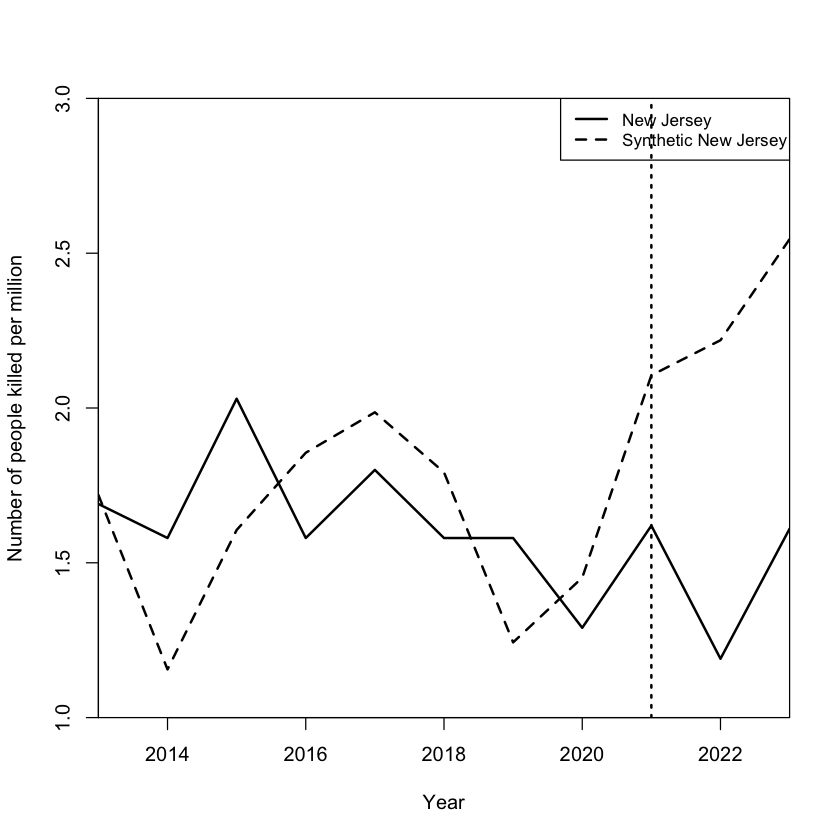

In [188]:
path.plot(synth.res = synth_out,
          dataprep.res = dataprep_out,
          tr.intake = 2021,
          Ylab = "Number of people killed per million",
          Xlab = "Year",
          Legend = c("New Jersey", "Synthetic New Jersey"),
        #   Main = "Figure 1: New Jersey vs. Synthetic New Jersey" ,
        Ylim = c(1,3)
          )


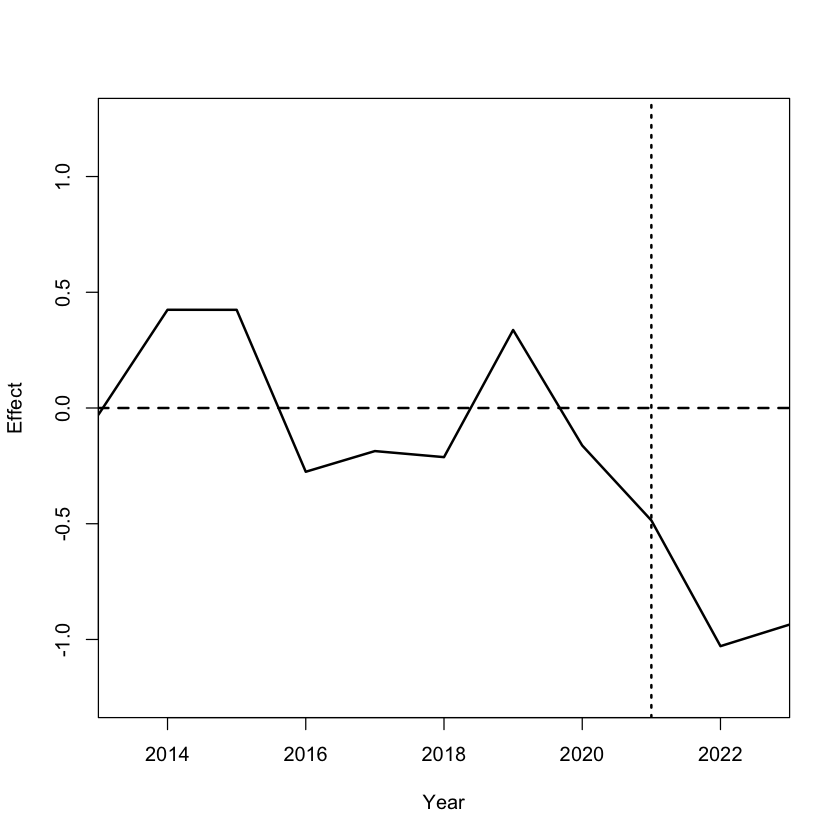

In [189]:
 gaps.plot(synth.res = synth_out,
          dataprep.res = dataprep_out,
          tr.intake = 2021,
          Ylab = "Effect",
          Xlab = "Year",
          Main = c("")
        #   Main = "Figure 2: Gap between fatalities in New Jersey and its synthetic ver."
        )


In [191]:
# Define the treated unit, donor pool, and treated year
treated_unit <- 29

excluded_states <- c("Connecticut", "New Mexico", "Colorado", "Illinois", "Maryland")

donor_pool <- unique(data$state_name[data$state_num != treated_unit & !data$state_name %in% excluded_states])

treated_year <- 2017

dataprep_out_placebo <- dataprep(
  foo = data,
  predictors = c("kills_per_million", "gdp_per_capita", "poc_percentage_population", "dem_majority", "dem_governor", "violent_crime_per_population", "homicide_per_population"),  # Review and adjust the predictors
  dependent = "kills_per_million",  # Verify that the outcome variable is correctly specified
  unit.variable = "state_num",  # Verify the variable representing countries/regions
  time.variable = "year",
  treatment.identifier = treated_unit,
  controls.identifier = donor_pool,
  time.predictors.prior = 2013:2017,  # Adjust the time range for the placebo test
  time.optimize.ssr = 2013:2017,  # Adjust the time range for the placebo test
  unit.names.variable = "state_name",
  time.plot = 2013:2023,  # Adjust the time range for the placebo test
)

synth_out_placebo <- synth(dataprep_out_placebo)


X1, X0, Z1, Z0 all come directly from dataprep object.


**************** 
 searching for synthetic control unit  
 

**************** 
**************** 
**************** 

MSPE (LOSS V): 0.01570044 

solution.v:
 0.7789005 0.04474357 0.02049833 0.006358397 0.004639997 0.002957332 0.1419018 

solution.w:
 2.16e-08 4e-09 1.4e-08 3.49e-08 2.7e-08 9.3e-09 4.23e-08 7e-10 0.001553274 7.69e-08 5.27e-08 4.51e-08 3.34e-08 8.26e-08 8.324e-07 6.23e-08 0.243978 0.1523665 1.367e-07 0.104205 1.01e-08 2.29e-08 3.72e-08 1.01e-08 1.216e-07 0.3178582 7.58e-08 1.48e-08 8.76e-08 1.11e-08 8.73e-08 6.6e-08 0.02855008 7.7e-09 2.92e-08 1.71e-08 2.51e-08 5.16e-08 1.684e-07 0.1514865 3.92e-08 2.67e-08 6.27e-08 2.21e-08 



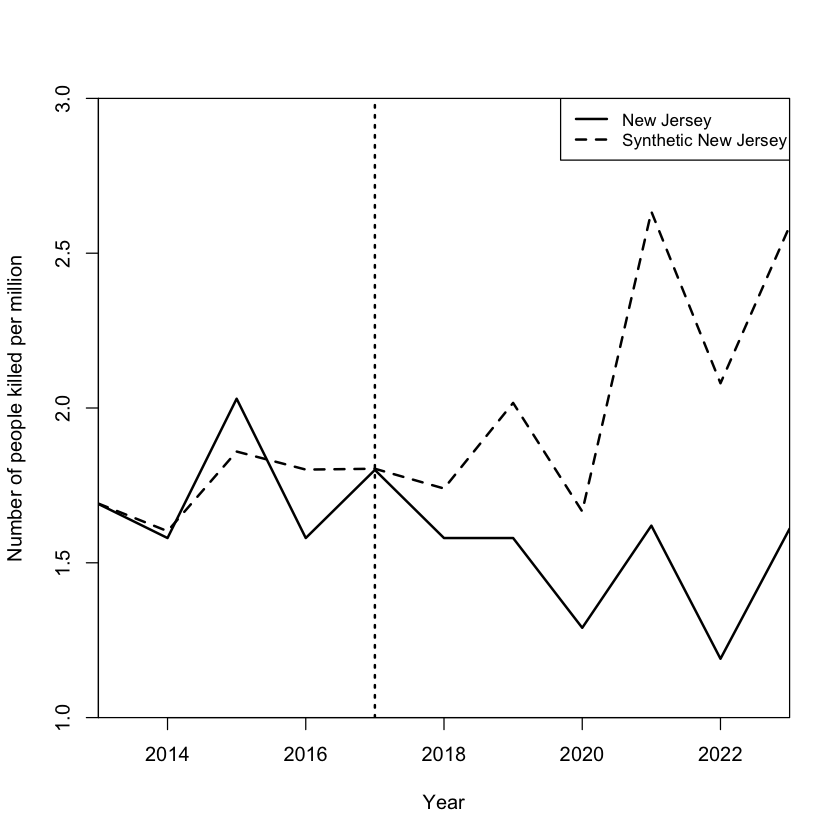

In [192]:
path.plot(synth.res = synth_out_placebo,
          dataprep.res = dataprep_out_placebo,
          tr.intake = 2017,
          Ylab = "Number of people killed per million",
          Xlab = "Year",
          Legend = c("New Jersey", "Synthetic New Jersey"),
        #   Main = "Figure 1: New Jersey vs. Synthetic New Jersey" ,
        Ylim = c(1,3)
          )

In [136]:
gaps <- dataprep_out$Y1plot - (dataprep_out$Y0plot %*% synth_out$solution.w)

donor_weights <- synth_out$solution.w
donor_names <- donor_pool

# Create a data frame with weights, names, and spacing
donor_data <- data.frame(Weights = donor_weights, States = donor_names)

# Use stargazer to display the data frame
library(stargazer)
stargazer(donor_data, type = "text", summary = FALSE)



   w.weight     States    
--------------------------
0  0.00000     Alabama    
1  0.00000      Alaska    
2  0.00000     Arizona    
3  0.00000     Arkansas   
4  0.00000    California  
7  0.00000     Delaware   
8  0.00000     Florida    
9  0.00000     Georgia    
10  0.047       Hawaii    
11 0.00000      Idaho     
13 0.00000     Indiana    
14 0.00000       Iowa     
15 0.00000      Kansas    
16 0.00000     Kentucky   
17 0.00000    Louisiana   
18 0.00000      Maine     
20 0.00000  Massachusetts 
21 0.00000     Michigan   
22 0.00000    Minnesota   
23 0.00000   Mississippi  
24 0.00000     Missouri   
25 0.00000     Montana    
26 0.00000     Nebraska   
27 0.00000      Nevada    
28  0.053   New Hampshire 
31  0.295      New York   
32 0.00000  North Carolina
33 0.00000   North Dakota 
34 0.00000       Ohio     
35 0.00000     Oklahoma   
36 0.00000      Oregon    
37 0.00000   Pennsylvania 
38  0.186    Rhode Island 
39 0.00000  South Carolina
40 0.00000   South Dakota 


In [ ]:
synth_tables <- synth.tab(dataprep.res = dataprep_out, synth.res = synth_out)

synth_tables[1:3]


$tab.pred
                               Treated Synthetic Sample Mean
kills_per_million                1.639     1.657       3.752
gdp_per_capita               67014.928 66761.505   57007.454
poc_percentage_population        0.257     0.251       0.178
dem_majority                     1.000     0.603       0.260
dem_governor                     0.444     0.737       0.326
violent_crime_per_population     0.002     0.003       0.004
homicide_per_population          0.000     0.000       0.000

$tab.v
                             v.weights
kills_per_million            0.425    
gdp_per_capita               0.084    
poc_percentage_population    0.04     
dem_majority                 0.002    
dem_governor                 0.002    
violent_crime_per_population 0.033    
homicide_per_population      0.415    

$tab.w
   w.weights     unit.names unit.numbers
0      0.000        Alabama            0
1      0.000         Alaska            1
2      0.000        Arizona            2
3      0.000       Arkansas            3
4      0.000     California            4
7      0.000       Delaware            7
8      0.000        Florida            8
9      0.000        Georgia            9
10     0.047         Hawaii           10
11     0.000          Idaho           11
13     0.000        Indiana           13
14     0.000           Iowa           14
15     0.000         Kansas           15
16     0.000       Kentucky           16
17     0.000      Louisiana           17
18     0.000          Maine           18
20     0.000  Massachusetts           20
21     0.000       Michigan           21
22     0.000      Minnesota           22
23     0.000    Mississippi           23
24     0.000       Missouri           24
25     0.000        Montana           25
26     0.000       Nebraska           26
27     0.000         Nevada           27
28     0.053  New Hampshire           28
31     0.295       New York           31
32     0.000 North Carolina           32
33     0.000   North Dakota           33
34     0.000           Ohio           34
35     0.000       Oklahoma           35
36     0.000         Oregon           36
37     0.000   Pennsylvania           37
38     0.186   Rhode Island           38
39     0.000 South Carolina           39
40     0.000   South Dakota           40
41     0.000      Tennessee           41
42     0.000          Texas           42
43     0.000           Utah           43
44     0.000        Vermont           44
45     0.420       Virginia           45
46     0.000     Washington           46
47     0.000  West Virginia           47
48     0.000      Wisconsin           48
49     0.000        Wyoming           49

In [138]:
if (!requireNamespace("remotes", quietly = TRUE)) {
  install.packages("remotes")
}

# Install SCtools package from GitHub
remotes::install_github("bcastanho/SCtools")


Using GitHub PAT from the git credential store.



Skipping install of 'SCtools' from a github remote, the SHA1 (64cdd39a) has not changed since last install.
  Use `force = TRUE` to force installation



In [139]:
library(SCtools)

In [ ]:
placebo <- generate.placebos(dataprep_out, synth_out, Sigf.ipop = 2, strategy='multicore')


X1, X0, Z1, Z0 all come directly from dataprep object.


**************** 
 searching for synthetic control unit  
 

**************** 
**************** 
**************** 

MSPE (LOSS V): 0.7551156 

solution.v:
 0.604941 2.35e-08 2.69e-08 1.07e-08 0.004554897 0.3576564 0.0328476 

solution.w:
 0.06367893 0.01179144 0.0207479 0.01375324 0.01654225 0.01607247 0.01543191 0.0110653 0.01084618 0.01688997 0.01349313 0.01486183 0.01228754 0.3306309 0.009827867 0.01503053 0.02185686 0.01179694 0.01265305 0.0197603 0.01092081 0.013167 0.01500629 0.01112857 0.01498975 0.0168252 0.01294045 0.01501045 0.01067499 0.01130173 0.01589458 0.01228559 0.02500404 0.01419416 0.04307566 0.01666977 0.01138054 0.01021188 0.01268081 0.01154577 0.01187501 0.01362784 0.01057062 


X1, X0, Z1, Z0 all come directly from dataprep object.


**************** 
 searching for synthetic control unit  
 

**************** 
**************** 
**************** 

MSPE (LOSS V): 12.11033 

solution.v:
 0.3853742 1.433e-06 0

New names:
* `w.weight` -> `w.weight...1`
* `w.weight` -> `w.weight...2`
* `w.weight` -> `w.weight...3`
* `w.weight` -> `w.weight...4`
* `w.weight` -> `w.weight...5`
* `w.weight` -> `w.weight...6`
* `w.weight` -> `w.weight...7`
* `w.weight` -> `w.weight...8`
* `w.weight` -> `w.weight...9`
* `w.weight` -> `w.weight...10`
* `w.weight` -> `w.weight...11`
* `w.weight` -> `w.weight...12`
* `w.weight` -> `w.weight...13`
* `w.weight` -> `w.weight...14`
* `w.weight` -> `w.weight...15`
* `w.weight` -> `w.weight...16`
* `w.weight` -> `w.weight...17`
* `w.weight` -> `w.weight...18`
* `w.weight` -> `w.weight...19`
* `w.weight` -> `w.weight...20`
* `w.weight` -> `w.weight...21`
* `w.weight` -> `w.weight...22`
* `w.weight` -> `w.weight...23`
* `w.weight` -> `w.weight...24`
* `w.weight` -> `w.weight...25`
* `w.weight` -> `w.weight...26`
* `w.weight` -> `w.weight...27`
* `w.weight` -> `w.weight...28`
* `w.weight` -> `w.weight...29`
* `w.weight` -> `w.weight...30`
* `w.weight` -> `w.weight...31`
* `w.w

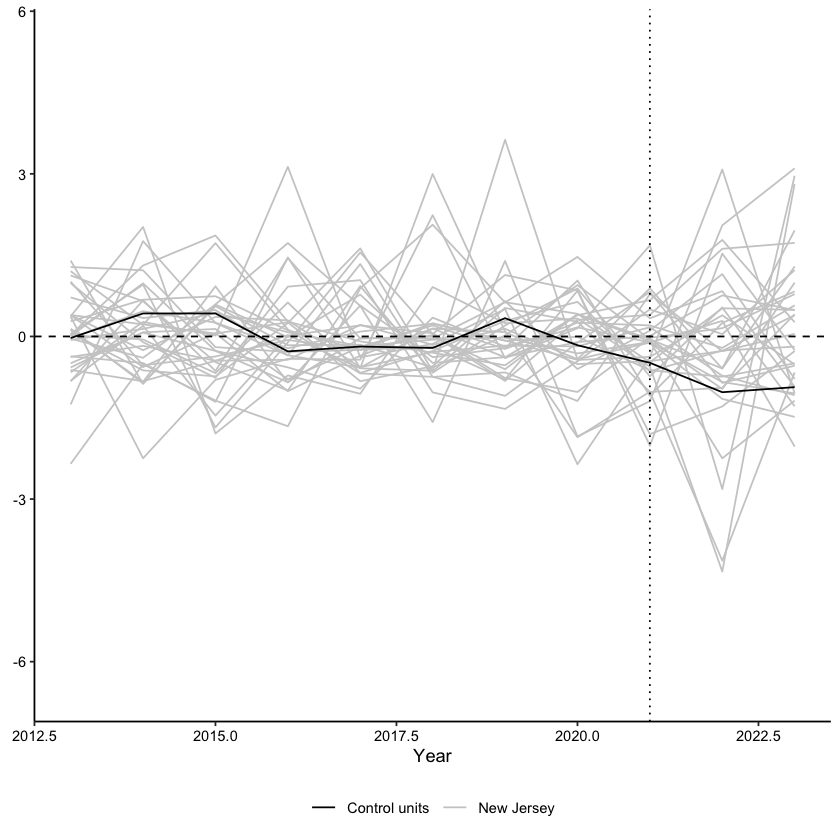

In [172]:
p <- plot_placebos(placebo, discard.extreme=TRUE, mspe.limit=20, xlab='Year')
p

In [177]:
# Calculate the p-value
ratio <- mspe.test(placebo)
print(ratio$p.val)


[1] 0.1111111


In [ ]:
print(ratio$test)

   MSPE.ratios           unit
1   0.99301667        Alabama
2   0.65081465         Alaska
3   0.32801321        Arizona
4   1.11015228       Arkansas
5   0.62351996     California
6   0.72291822       Delaware
7   0.98601907        Florida
8   6.08476045        Georgia
9   4.44474031         Hawaii
10  5.29925888          Idaho
11  7.97021962        Indiana
12  6.39747344           Iowa
13  0.03554744         Kansas
14  6.96640300       Kentucky
15  1.48956992      Louisiana
16  0.21352986          Maine
17  8.19535474  Massachusetts
18  1.38596797       Michigan
19 22.36468396      Minnesota
20  0.41442301    Mississippi
21  1.56730860       Missouri
22  0.10221264        Montana
23  1.12529125       Nebraska
24  0.26153535         Nevada
25  0.66671215  New Hampshire
26  1.25356890       New York
27  0.20254917 North Carolina
28  0.39761691   North Dakota
29  2.58488775           Ohio
30  0.25688946       Oklahoma
31 12.05312520         Oregon
32  1.82382258   Pennsylvania
33  0.6290

Warning message in mspe.plot(placebo, discard.extreme = FALSE, mspe.limit = 100, :
"discard.extreme is FALSE. mspe.limit will be ignored."


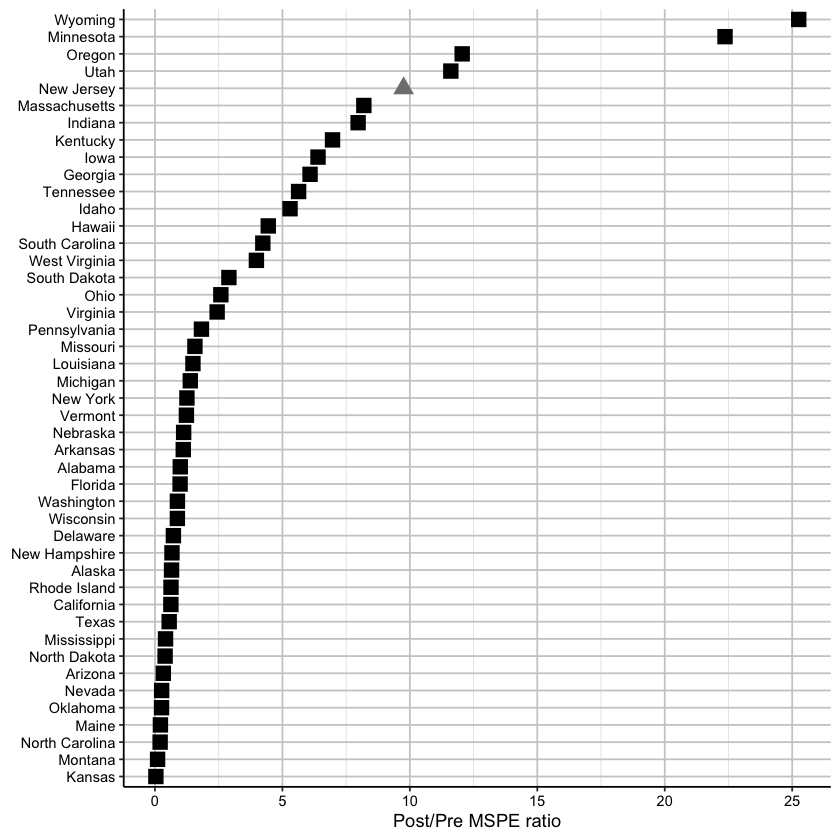

In [180]:
mspe.plot(
  placebo,
  discard.extreme = FALSE,
  mspe.limit = 100,
  plot.hist = FALSE,
  title = NULL,
  xlab = "Post/Pre MSPE ratio",
  ylab = NULL
)

In [ ]:
install.packages(("knitr"))


The downloaded binary packages are in
	/var/folders/rl/t9lj4wh550nf1_k3yl68t9br0000gn/T//RtmpqjhOrD/downloaded_packages


In [146]:
# Load the knitr package
library(knitr)

# Create a data frame with the provided data
data <- data.frame(
  Predictor = c(
    "kills_per_million", 
    "gdp", 
    "poc_percentage_population", 
    "dem_majority", 
    "dem_governor", 
    "violent_crime_per_population", 
    "homicide_per_populaiton"
  ),
  Weight = c(0.261, 0.277, 0, 0.025, 0.192, 0.13, 0.116)
)

# Create a LaTeX-style table
kable(data, format = "latex", booktabs = TRUE, caption = "Predictor weights")


\begin{table}

\caption{Predictor weights}
\centering
\begin{tabular}[t]{lr}
\toprule
Predictor & Weight\\
\midrule
kills\_per\_million & 0.261\\
gdp & 0.277\\
poc\_percentage\_population & 0.000\\
dem\_majority & 0.025\\
dem\_governor & 0.192\\
\addlinespace
violent\_crime\_per\_population & 0.130\\
homicide\_per\_populaiton & 0.116\\
\bottomrule
\end{tabular}
\end{table}

In [147]:
install.packages(("xtable"))


The downloaded binary packages are in
	/var/folders/rl/t9lj4wh550nf1_k3yl68t9br0000gn/T//RtmpqjhOrD/downloaded_packages
